# Computer Vision: Image Classification of CIFAR-10 dataset using TensorFlow

# Libraries

In [1]:
# importing tensorflow and keras

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical, plot_model

# Loading the Dataset

In [3]:
# Loading the dataset

Cifar10=keras.datasets.cifar10 # Loading the dataset

(xtrain,ytrain),(xtest,ytest)= Cifar10.load_data()

print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)
print(ytrain)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)
[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


Observations:

*  There are 60,000 images. We assigned 10,000 to test dataset
*  Images are black and white and is of 32 x 32 pixels
*  Train Images: Array of 60,000 images in 32 X 32 pixel
*  Train Labels: Integer array of 60,000 labels, value between 0 to 9
*  Test Images: Array of 10,000 images in 32 X 32 pixel
*  Test Labels: Integer array of 10,000 labels, value between 0 to 9
*  Each image mapped to a single label
*  Each integer value in label array represent clothing item


In [4]:
# Defining array. Each item of array represent integer value of labels. 10 clothing item for 10 integer label.

class_names =['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
print(class_names)

['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']


# Evaluation of the data


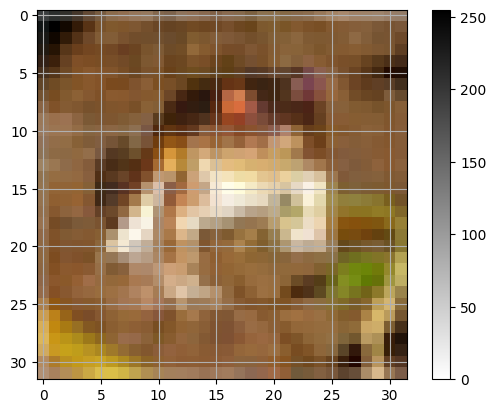

Class ID: [6] and Class name: Frog


In [5]:
# inspect the data in the array

index=0 # change this number
plt.imshow(xtrain[index], cmap=plt.cm.binary) # printing 10th image. You may use cmap='gray'
plt.colorbar() # shows the bar on the right side of the image
plt.grid(True) # will shot the grid
plt.show()
print("Class ID: %s and Class name: %s" % (ytrain[index], class_names[ytrain[index][0]]))

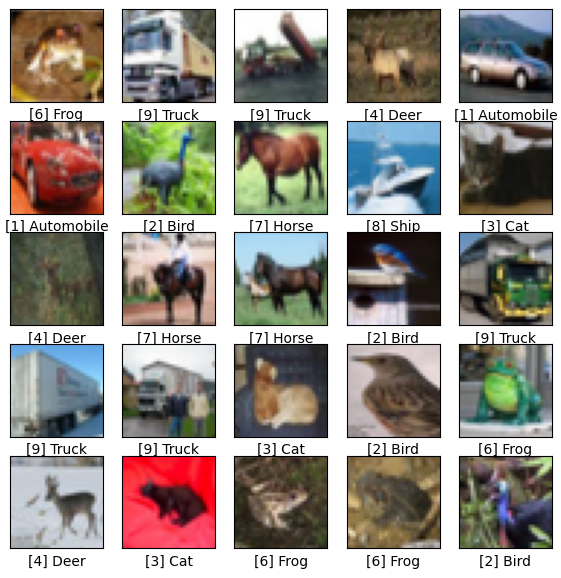

In [7]:
# display the first 25 images from traing set

plt.figure(figsize=(7,7))
for i in range(25): # 25 images
  plt.subplot(5,5,i+1) # matrix of 5 X 5 array
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(xtrain[i], cmap=plt.cm.binary) # printing binary/black and white image
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
  plt.xlabel("%s %s" % (ytrain[i], class_names[ytrain[i][0]])) # Assigning name to each image
plt.show()

# Data Preprocessing

In [8]:
# Pixel value of the image falls between 0 to 255.

xtrain = xtrain/255 # So, we are scale the value between 0 to 1 before by deviding each value by 255
print(xtrain.shape)

xtest = xtest/255 # So, we are scale the value between 0 to 1 before by deviding each value by 255
print(xtest.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


One hot encoding of the labels

In [9]:
# One hot encoding of the labels.

# Before one hot encoding
print("ytrain Shape: %s and value: %s" % (ytrain.shape, ytrain))
print("ytest Shape: %s and value: %s" % (ytest.shape, ytest))

ytrain=to_categorical(ytrain)
ytest=to_categorical(ytest)

# After one hot encoding
print("ytrain Shape: %s and value: %s" % (ytrain.shape, ytrain[0]))
print("ytest Shape: %s and value: %s" % (ytest.shape, ytest[1]))

ytrain Shape: (50000, 1) and value: [[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
ytest Shape: (10000, 1) and value: [[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]
ytrain Shape: (50000, 10) and value: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
ytest Shape: (10000, 10) and value: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


# Modelling - Model on CNN

Building the model

In [10]:
# Modelling - Model on CNN

from tensorflow.keras import models, layers
from keras.layers import Conv2D, MaxPooling2D, Flatten , Dense, Activation,Dropout

# create a sequential model i.e. empty neural network which has no layers in it.
model=models.Sequential()

#==================== Feature Detection / extraction Block ====================#

# Add first convolutional block

model.add(layers.Conv2D(64,(3,3),input_shape=(32,32,3),activation='relu'))
model.add(layers.Conv2D(64,(3,3),input_shape=(32,32,3),activation='relu'))
# Add the max pooling layer
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Add Second convolutional block

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
# Add the max pooling layer
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Add Third convolutional block
model.add(layers.Conv2D(256,(3,3),activation='relu'))

# Add the max pooling layer
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


#==================== Transition Block (from feature detection to classification) ====================#

# Add Flatten layer. Flatten simply converts matrics to array
model.add(layers.Flatten(input_shape=(32,32))) # this will flatten the image and after this Classification happens

#==================== Classification Block ====================#

# Classification segment - fully connected network
# The Dence layer does classification and is deep neural network. Dense layer always accept the array.
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(80, activation='relu'))

# Add the output layer
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Compile the Model

In [12]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 10, 10, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 3, 3, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          12,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 80)                  │           8,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             810 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 610,014 (2.33 MB)

 Trainable params: 610,014 (2.33 MB)

 Non-trainable params: 0 (0.00 B)

Train the model

In [13]:
# Train the model
# We are using google collab T4 GPU
xtrain2=xtrain.reshape(50000,32,32,3)
xtest2=xtest.reshape(10000,32,32,3)

print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

model.fit(xtrain2,ytrain,epochs=40,batch_size=56,verbose=True,validation_data=(xtest2,ytest))

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
(10000, 10)
Epoch 1/40
893/893 ━━━━━━━━━━━━━━━━━━━━ 23s 16ms/step - accuracy: 0.2587 - loss: 1.9501 - val_accuracy: 0.4338 - val_loss: 1.5455
Epoch 2/40
893/893 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.5065 - loss: 1.3547 - val_accuracy: 0.5497 - val_loss: 1.2917
Epoch 3/40
893/893 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.5940 - loss: 1.1451 - val_accuracy: 0.6326 - val_loss: 1.0469
Epoch 4/40
893/893 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.6378 - loss: 1.0244 - val_accuracy: 0.6506 - val_loss: 1.0056
Epoch 5/40
893/893 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6733 - loss: 0.9317 - val_accuracy: 0.6934 - val_loss: 0.8705
Epoch 6/40
893/893 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.6920 - loss: 0.8778 - val_accuracy: 0.7156 - val_loss: 0.8352
Epoch 7/40
893/893 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7127 - loss: 0.8175 - val_accuracy: 0.7214 - val_loss: 0.8038
Epoch 8/40
893/893 ━━━━━━━━━━━━━━━━━━

# Model evaluation

In [14]:
# evaluate accuracy of the model

test_loss, test_acc = model.evaluate(xtest2, ytest)
print("accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7907 - loss: 0.6867
accuracy: 0.7875000238418579


Observation:



*  there is a very little gap between accracy of train and test model i.e. 0.9881 and 0.9826 that means model does not overfit.




# Testing the model on data

Creating a function to verify prediction is True or False

In [16]:
# creating a funtion which will help to verify the prediction is true of not

def plot_image(i, predictions_array, true_label, img): # taking index and 3 arrays viz. prediction array, true label array and image array

  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary) # showing b/w image

  predicted_label=np.argmax(predictions_array)
  true_label=np.argmax(true_label)

  # print(predicted_label)
  # print(true_label)

  if predicted_label == true_label: #setting up label color
    color='blue' # correct then blue colour

  else:
    color='red' # wrong then red colour

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
             color=color)

# function to display bar chart showing whether image prediction is how much correct
def plot_value_array(i, predictions_array, true_label): # taking index along with predictions and true label array
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot=plt.bar(range(10), predictions_array, color='gray')
  plt.ylim([0,1])
  predicted_label=np.argmax(predictions_array)
  true_label=np.argmax(true_label)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

Test for single image

In [29]:
i=215 # You may change value of i to play around

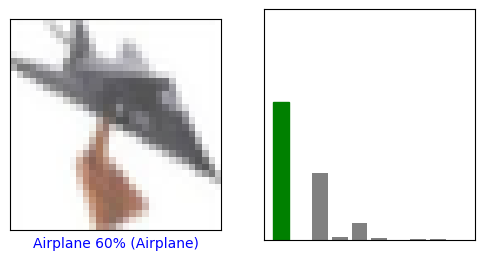

In [30]:
# call the function
# defining parameters to pass to function
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, ytest, xtest)
plt.subplot(1,2,2)
plot_value_array(i, predictions, ytest)
plt.show()

(32, 32, 3)
(1, 32, 32, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[0.5999876  0.00105201 0.29130873 0.01219337 0.07678048 0.0085712
  0.00068121 0.00419858 0.00414863 0.00107819]]


0

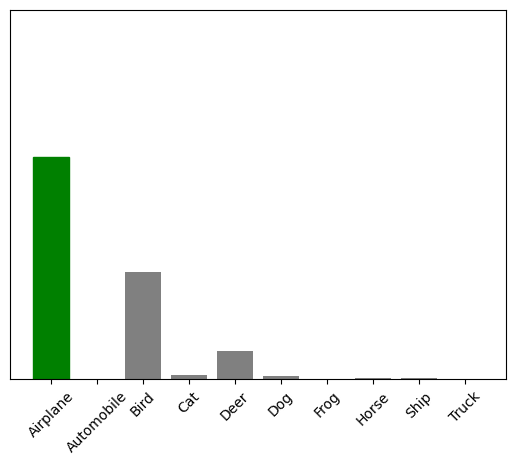

In [31]:
# verification our prediction on single image
img = xtest2[i]
print(img.shape)

img=(np.expand_dims(img,0))
print(img.shape)

predictions_single = model.predict(img)
print(predictions_single)

plot_value_array(i, predictions,ytest)
_ = plt.xticks(range(10), class_names,rotation=45)

np.argmax(predictions_single[0])

Verifying several images

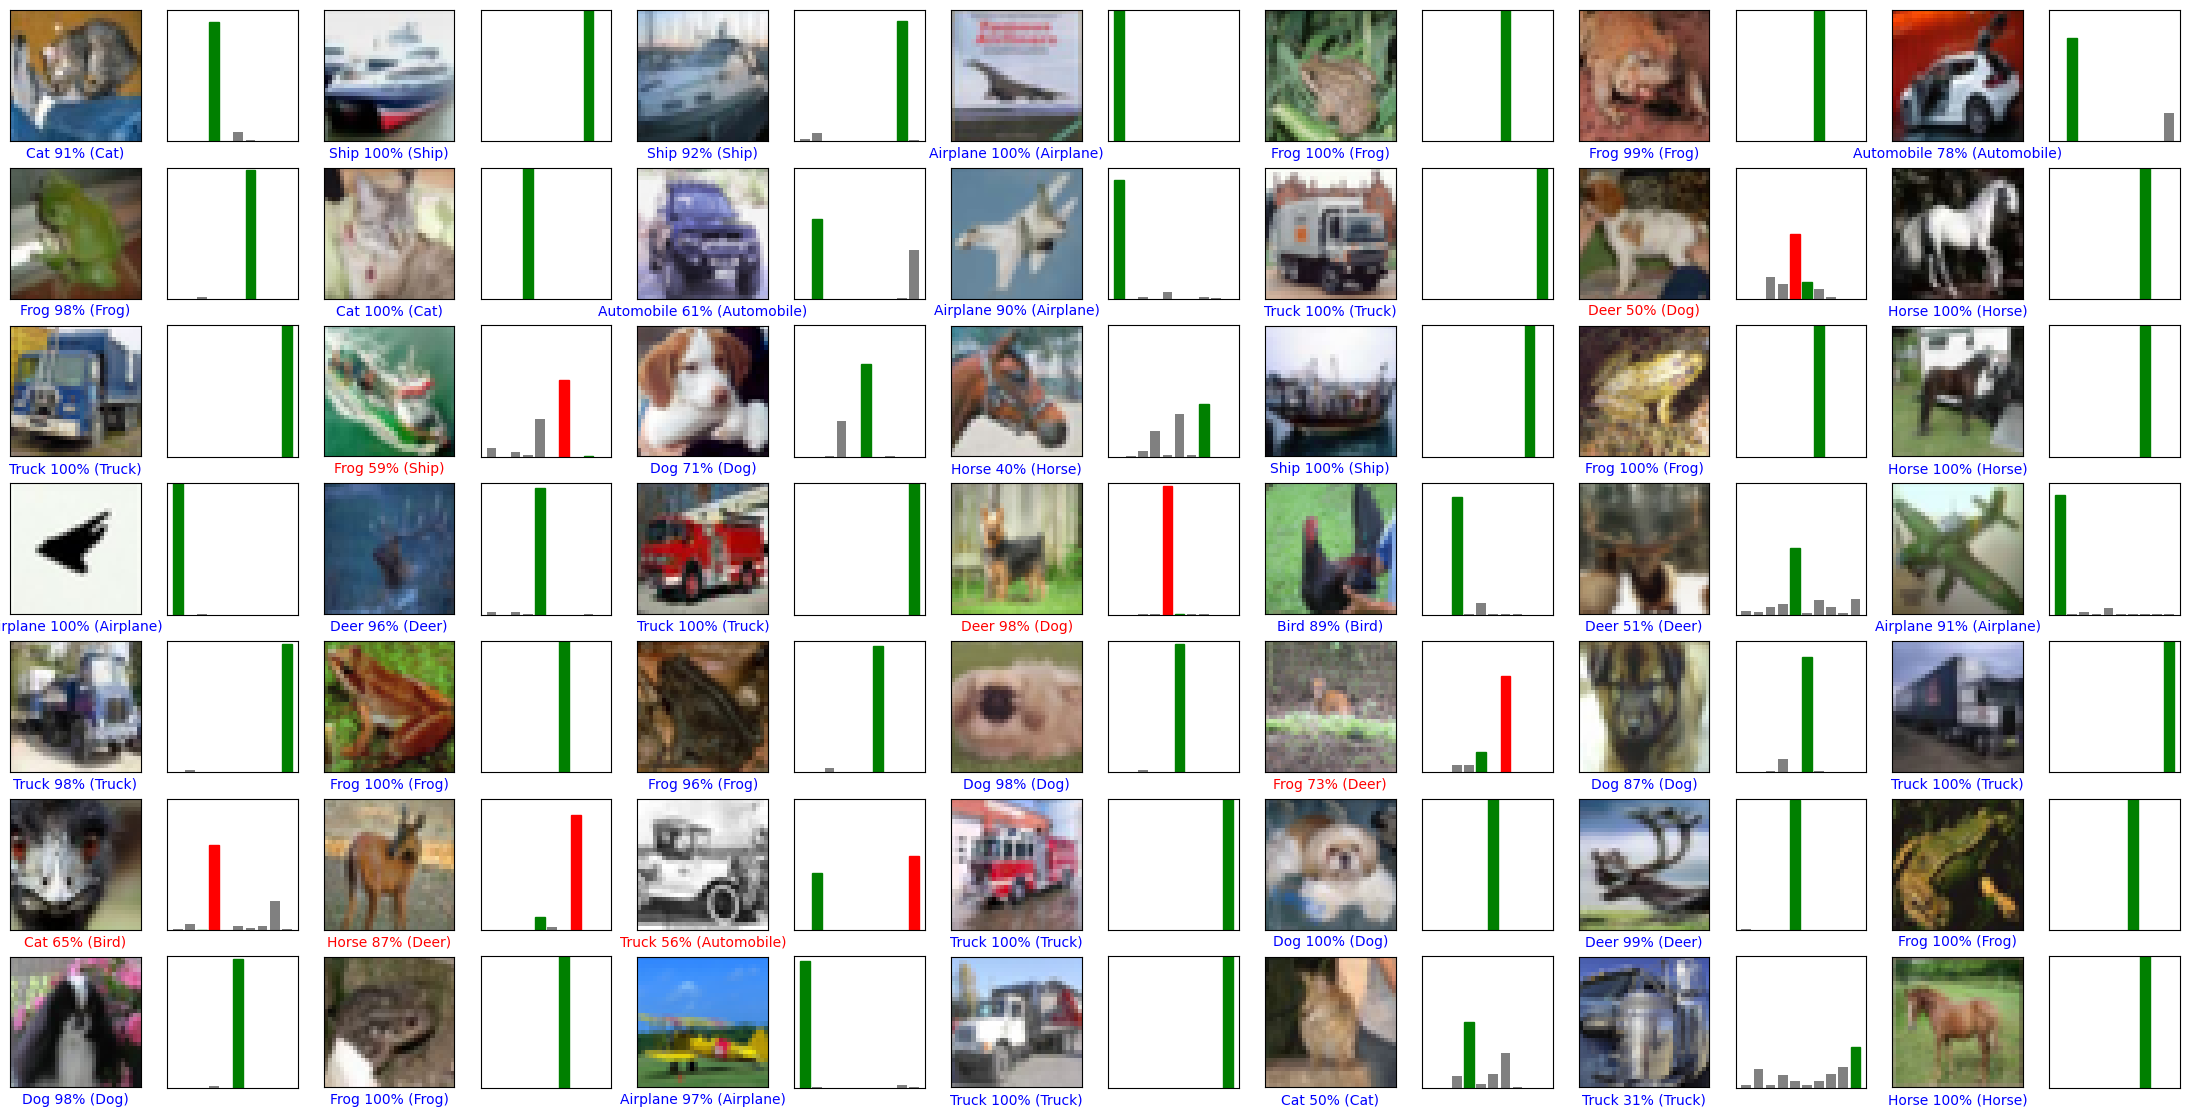

In [33]:
# verification of several images

num_rows=7
num_cols=7
num_images=num_rows*num_cols

plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i,predictions, ytest, xtest)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, ytest)
plt.show()

# Conclusions

Conclusions


*  With a complex sequential model with multiple convolution layers and 40 epochs for the training, we obtained an accuracy 0.85 for test prediction.
*   After investigating the validation accuracy and loss, we understood that the model is little overfitting.
*   Model may be retrained with Dropout layers to reduce overfitting.
*   Most of the images can be identified except in few cases for Deer and Automobile. Model is poor at identifying Deer.







